In [1]:
#import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

import sys, os
cwd = os.getcwd()
sys.path.append('../src/')

import Markers
m = Markers.Markers({
        "markers": ["test"]
      , "AllowLimit": 10
      , "LearnLimit": 3
      , "collectorId": "mygate"
      , "minimumLearning": 1000
})

New markers
{'markers': ['test'], 'AllowLimit': 10, 'LearnLimit': 3, 'collectorId': 'mygate', 'minimumLearning': 1000}
Reset markers numFeatures 1


In [12]:
for i in range(11):
    m.assess( {"markers": [1+i/11]})
    m.learn()

*** Markers *** Learn MEAN and SDEV
*** Markers *** Learn MEAN and SDEV - free slot 1
mean is now [[ 3.23913043e+000  2.41735537e+000 -1.79769313e+308 -1.79769313e+308]]
sdev is now [[0.48941681 0.66883456 1.         1.        ]]
*** Markers *** Learn MEAN and SDEV - clear


Storing markers
2
mean is now [[ 3.23913043e+000  2.41735537e+000 -1.79769313e+308 -1.79769313e+308]]
sdev is now [[0.48941681 0.66883456 1.         1.        ]]
mean is now [[ 3.23913043e+000  2.02500000e+000 -1.79769313e+308 -1.79769313e+308]]
sdev is now [[0.48941681 0.67748243 1.         1.        ]]
3.239130434782609 0.4894168124004458
2.0249999999999995 0.6774824263525447


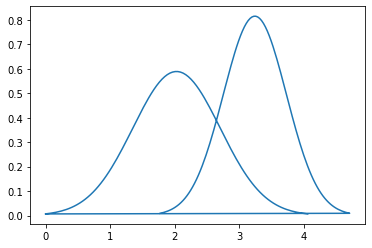

In [13]:
status = {}
m.crdstore(status)
s = status["markers"]["test"]
print(len(s.keys()))
m.crdload(status)

allx = []
ally = []
for i in range(len(s.keys())):
    mu = m.mean[0][i]
    sigma = m.sdev[0][i]
    print(mu, sigma)

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    allx.extend(x.tolist())
    ally.extend(norm.pdf(x, mu, sigma).tolist())
plt.plot(allx, ally)
plt.show()